In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import re
from wordcloud import WordCloud
import pycountry
from textblob import TextBlob
from nrclex import NRCLex

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to C:\Users\Asus-
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Asus-
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Asus-
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
d1s1 = pd.read_excel('../data/[GDC Dataset 1] Global Dialogue Cadence 1 Results.xlsx', sheet_name='GD1_opinion_questions')
d1s2 = pd.read_excel('../data/[GDC Dataset 1] Global Dialogue Cadence 1 Results.xlsx', sheet_name='GD1_poll_questions')

d2s1 = pd.read_excel('../data/[GDC Dataset 2] Personalized AI Dialogue Results.xlsx', sheet_name='MD1_opinion_questions')
d2s2 = pd.read_excel('../data/[GDC Dataset 2] Personalized AI Dialogue Results.xlsx', sheet_name='MD1_poll_questions')

In [4]:
d2s1.head(3)

,Question ID,Question Type,Question,English Responses,Submitted By,Language,Participant ID,Sentiment,All(1071),O2: 18-25 (320),...,Southern Europe (24),Western Europe (44),O1: Portuguese (Brazil) (32),O1: Arabic (20),O1: Russian (34),O1: Spanish (72),O1: Chinese (China) (70),O1: English (827),O1: French (11),O1: Hindi (5)
0,c67e414e-a02f-4ef5-a26a-68553a1df15f,Ask Opinion,"When you work with an AI assistant, would you ...","More formal in your answers, since in the cont...","Central America, North America, O1: Spanish, O...",Spanish,45d44313-c928-4cdb-aa31-d60608077fd5,Neutral,0.58,0.58,...,0.71,0.55,0.53,0.65,0.44,0.67,0.59,0.58,0.36,0.8
1,c67e414e-a02f-4ef5-a26a-68553a1df15f,Ask Opinion,"When you work with an AI assistant, would you ...","When I work with an AI assistent, I would pref...","Asia, O1: English, O2: 18-25, O3: Female, O4: ...",English,3ed1edc8-f2de-40e0-b117-64bdbaeefe04,Neutral,0.58,0.59,...,0.75,0.57,0.53,0.60,0.47,0.64,0.60,0.58,0.36,0.8
2,c67e414e-a02f-4ef5-a26a-68553a1df15f,Ask Opinion,"When you work with an AI assistant, would you ...",I would prefer it to provide detailed explanat...,"Asia, O1: English, O2: 26-35, O3: Female, O4: ...",English,1866883e-45e9-483f-836a-2fc8789bdccf,Neutral,0.58,0.55,...,0.67,0.57,0.47,0.60,0.41,0.63,0.60,0.58,0.27,0.8


In [5]:
d1s2.head(3)

,Question ID,Question Type,Question,Responses,All(1294),O1: Arabic (17),O1: English (997),O1: Russian (29),O1: Chinese Simplified (105),O1: French (13),...,South Eastern Asia (91),Souther Asia (276),Western Asia (59),Caribbean (2),Central America (23),Northern America (144),Eastern Europe (35),Norther Europe (68),Southern Europe (32),Western Europe (43)
0,ac7724c0-5aad-414a-b06d-19c05818892c,Poll Single Select,Please select your preferred language:,Arabic,0.013,1.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.034,0.0,0.000,0.000,0.000,0.000,0.031,0.000
1,ac7724c0-5aad-414a-b06d-19c05818892c,Poll Single Select,Please select your preferred language:,English,0.770,0.0,1.0,0.0,0.0,0.0,...,0.989,0.982,0.881,1.0,0.087,0.778,0.771,0.735,0.656,0.767
2,ac7724c0-5aad-414a-b06d-19c05818892c,Poll Single Select,Please select your preferred language:,Russian,0.022,0.0,0.0,1.0,0.0,0.0,...,0.000,0.000,0.068,0.0,0.000,0.007,0.229,0.029,0.031,0.047


In [6]:
language_df = d1s2.iloc[0:8, 3:5]
language_df['All(1294)'] = language_df['All(1294)'] * 100

language_df

,Responses,All(1294)
0,Arabic,1.3
1,English,77.0
2,Russian,2.2
3,Chinese (China),8.1
4,French,1.0
5,Portuguese,2.9
6,Hindi,0.4
7,Spanish,7.0


In [7]:
print("Overall, would you say the increased use of artificial intelligence (AI) in daily life makes you feel…")

feel_df = d1s2.iloc[22:25, 3:5]
feel_df['All(1294)'] = feel_df['All(1294)'] * 100
feel_df

Overall, would you say the increased use of artificial intelligence (AI) in daily life makes you feel…


,Responses,All(1294)
22,More excited than concerned,34.5
23,Equally concerned and excited,55.6
24,More concerned than excited,9.8


In [8]:
print("Countries with the most respondents:")

population_df = d1s2.iloc[33:230, 3:5]
population_df['All(1294)'] = population_df['All(1294)'] * 100
population_df = population_df.sort_values(by='All(1294)', ascending=False)
population_df.head(10)

Countries with the most respondents:


,Responses,All(1294)
108,India,18.1
120,Kenya,14.7
220,United States,7.7
68,China,6.8
67,Chile,4.3
219,United Kingdom,3.8
63,Canada,3.4
109,Indonesia,3.2
56,Brazil,3.2
113,Israel,2.7


In [9]:
print("Countries with the most respondents:")

population_df2 = d2s2.iloc[33:229, 3:5]
population_df2['All(1120)'] = population_df2['All(1120)'] * 100
population_df2 = population_df2.sort_values(by='All(1120)', ascending=False)
population_df2.head(10)

Countries with the most respondents:


,Responses,All(1120)
108,India,18.7
120,Kenya,15.8
219,United States,6.4
67,Chile,4.3
218,United Kingdom,4.2
68,China,4.2
113,Israel,3.8
109,Indonesia,3.6
56,Brazil,3.1
63,Canada,2.8


In [10]:
print("Unique questions in Dataset 2, Section 1:")
d1s1['Question'].unique()


Unique questions in Dataset 2, Section 1:


array(["What do you think your life might be like in 30 years? Alt: Imagine life 30 years from now. What's the biggest difference you notice in daily life compared to today?",
       'What is another dangerous outcome you can imagine happening from AI? What would need to be true for that to happen?',
       'What is another positive outcome you can imagine happening from AI? What would need to be true for that to happen?',
       'What are the first decisions in your life that you would delegate to an AI?',
       'Describe a concrete scenario where you would feel uncomfortable with an AI making a decision instead of a human. What specific aspects make you uneasy?',
       'Explain what makes one of these scenarios better to you than the other.',
       'What is ONE specific ethical or moral principle, virtue, or value that you think is core to how you live your life? Please explain it in detail.',
       'What is one ethical or moral principle, virtue, or value that you think is impor

In [11]:
print("Unique questions in Dataset 2, Section 1:")
d2s1['Question'].unique()

Unique questions in Dataset 2, Section 1:


array(['When you work with an AI assistant, would you prefer it to: \nBe more formal or casual in its responses?\nProvide detailed explanations or get straight to the point?\nTake on a specific role (like a teacher, editor, or coach)?\nFocus on certain topics or areas of expertise?',
       'What kind of personality traits would be most helpful for your needs? For instance:\nShould it be more analytical or creative?\nWould you like it to ask clarifying questions or work with what you provide?\nShould it challenge your ideas or mainly provide support?',
       'Would you want your AI to be tailored to your local context? What would that look like?',
       'Think about your goals:\nAre you using AI mainly for learning, productivity, creativity, or something else? How well is it working?',
       'Think about your goals:\nWould you prefer responses that encourage discussion or just give direct answers?',
       "Imagine you're working with an AI assistant on important tasks in your life.

★★★

Now that we are familiarized with the data, we move to the more relvant data for our project:

In [12]:
print("Size of Dataset 1:", len(d1s1))
print("Size of Dataset 2:", len(d2s1))

Size of Dataset 1: 19669
Size of Dataset 2: 20869


In [13]:
live_df = d1s2.iloc[19:22, 3:5]
live_df['All(1294)'] = live_df['All(1294)'] * 100
live_df

,Responses,All(1294)
19,Rural,7.5
20,Suburban,27.1
21,Urban,65.4


In [14]:
live_df = d2s2.iloc[19:22, 3:5]
live_df['All(1120)'] = live_df['All(1120)'] * 100
live_df

,Responses,All(1120)
19,Rural,7.1
20,Suburban,26.0
21,Urban,67.0


Question: What is another positive outcome you can imagine happening from AI? What would need to be true for that to happen?

In [15]:
q1_df = d1s1[d1s1['Question'] == "What is another positive outcome you can imagine happening from AI? What would need to be true for that to happen?"][['English Response', 'Submitted By']]

def extract_area(text):
    if pd.isna(text):
        return np.nan
    text = text.lower()
    if " urban" in text:
        return "Urban"
    elif " suburban" in text:
        return "Suburban"
    elif " rural" in text:
        return "Rural"
    else:
        return "Unknown"

q1_df['Area Type'] = q1_df['Submitted By'].apply(extract_area)
# q1_df['Area Type'].value_counts()
# q1_df

In [16]:
q1_df = q1_df.dropna(subset=['English Response', 'Area Type'])
grouped_texts = q1_df.groupby('Area Type')['English Response'].apply(lambda x: ' '.join(x)).to_dict()
# grouped_texts

In [17]:
stopwords = set([
    'the', 'and', 'for', 'that', 'with', 'this', 'from', 'have', 'will', 'would', 'could', 'they',
    'their', 'which', 'what', 'when', 'where', 'about', 'like', 'just', 'some', 'more', 'into', 
    'than', 'then', 'them', 'been', 'being', 'because', 'very', 'make', 'might', 'also', 'those',
    'can', 'you', 'your', 'our', 'one', 'are', 'not', 'but', 'all', 'how', 'who', 'has', 'had', 
    'there', 'any', 'such', 'many', 'its', "it's", 'etc', 'need', 'get', 'still', 'way', 'use', 'ai',
    'well', 'mainly' , 'using', 'mostly', 'sometimes', 'things', 'give'
])

def get_common_words(text, top_n=20):
    words = re.findall(r'\b\w+\b', text.lower())
    filtered_words = [lemmatizer.lemmatize(w) for w in words if w not in stopwords and len(w) > 3]
    return Counter(filtered_words).most_common(top_n)

keywords_by_area = {}

for area, text in grouped_texts.items():
    keywords_by_area[area] = get_common_words(text)


In [18]:
for area, keywords in keywords_by_area.items():
    print(f"\nTop keywords for {area}:")
    for word, count in keywords:
        print(f"{word}: {count}")


Top keywords for Rural:
help: 27
life: 22
people: 19
think: 17
positive: 16
task: 14
better: 12
time: 12
work: 11
human: 11
health: 10
outcome: 10
job: 10
change: 9
data: 9
these: 8
world: 8
most: 8
easier: 8
less: 8

Top keywords for Suburban:
help: 99
people: 92
human: 91
work: 55
life: 53
time: 47
positive: 45
data: 43
task: 40
system: 37
outcome: 35
think: 34
used: 33
technology: 32
easier: 32
information: 32
better: 30
happen: 28
job: 25
health: 24

Top keywords for Urban:
help: 237
human: 203
people: 192
life: 170
time: 145
work: 139
positive: 108
task: 101
system: 93
data: 85
outcome: 80
think: 76
better: 75
happen: 73
information: 71
improve: 70
artificial: 67
intelligence: 67
health: 65
easier: 58


In [19]:
urban_words = set(word for word, _ in keywords_by_area.get('Urban', []))
rural_words = set(word for word, _ in keywords_by_area.get('Rural', []))
suburban_words = set(word for word, _ in keywords_by_area.get('Suburban', []))

shared_words = urban_words & rural_words & suburban_words
print("Words shared by all area types:", shared_words)

Words shared by all area types: {'data', 'life', 'better', 'human', 'task', 'outcome', 'help', 'think', 'easier', 'health', 'people', 'positive', 'time', 'work'}


Q2. What is another dangerous outcome you can imagine happening from AI? What would need to be true for that to happen?

In [20]:
q2_df = d1s1[d1s1['Question'] == "What is another dangerous outcome you can imagine happening from AI? What would need to be true for that to happen?"][['English Response', 'Submitted By']]

q2_df['Area Type'] = q2_df['Submitted By'].apply(extract_area)

q2_df = q2_df.dropna(subset=['English Response', 'Area Type'])
grouped_textsq2 = q2_df.groupby('Area Type')['English Response'].apply(lambda x: ' '.join(x)).to_dict()

keywords_by_areaq2 = {}

for area, text in grouped_textsq2.items():
    keywords_by_areaq2[area] = get_common_words(text)


for area, keywords in keywords_by_areaq2.items():
    print(f"\nTop keywords for {area}:")
    for word, count in keywords:
        print(f"{word}: {count}")


Top keywords for Rural:
people: 55
human: 44
job: 22
system: 20
dangerous: 18
technology: 16
think: 16
privacy: 13
weapon: 13
happen: 12
other: 12
over: 12
imagine: 10
outcome: 10
government: 10
become: 10
world: 10
already: 9
lead: 9
data: 9

Top keywords for Suburban:
people: 186
human: 152
job: 69
think: 68
dangerous: 55
system: 53
technology: 49
outcome: 42
used: 40
lead: 39
become: 38
most: 37
control: 36
privacy: 34
information: 34
already: 33
happen: 32
over: 32
company: 31
intelligence: 30

Top keywords for Urban:
people: 423
human: 373
intelligence: 172
artificial: 153
think: 151
job: 132
dangerous: 132
control: 114
system: 107
data: 103
become: 98
technology: 95
lead: 93
used: 91
life: 90
happen: 89
outcome: 83
over: 82
work: 81
information: 78


In [21]:
pd.set_option('display.max_colwidth', None)
q2_df[q2_df['English Response'].str.contains(r'\bprivacy\b', case=False, na=False)][[ 'English Response', 'Area Type' ]]


,English Response,Area Type
1253,"AI has many risks, such as loss of jobs and economic disruptions, algorithm bias, privacy, misinformation and deep fakes, and a lack of regulation and accountability.",Urban
1255,Dangerous outcome can be threatening to privacy & AI can be use for terrorism purpose & there will be lack of job.,Suburban
1260,"Economic inequality, loss of privacy, information manipulation, dependence on AI, development of autonomous weapons. For this to happen, there would need to be a lack of external regulation or a lack of access to the technology as it would become more expensive\n\n",Urban
1272,"Things like AI bias and discrimination, lose of privacy, autonomous weapon, deep fakes and misinformation etc",Urban
1279,"Recently, there was news about AI face-changing in South Korea. Many women's photos were maliciously used in the pornography industry. The negative impact of this deep fake is terrible. People's privacy and security will be greatly hidden. The risk of being impersonated will increase. Innocent people may be involved in fraud, murder, etc. If there is no supervision and constraints, I dare not imagine what the consequences will be. In the era of big data, people's private data can be easily obtained. Algorithms can already recommend and filter information according to people's preferences. Artificial intelligence will only be better.",Urban
...,...,...
2388,"We already don't have any privacy in our life, it is actually disappointing that in the near future it will be worse. We won't have anything known as as private",Urban
2408,"The privacy of our data is one of the most important things to keep in mind, even though it is currently a topic that a large part of the population is unaware of, I think that in the future there will be increasingly strict regulations for the use and sharing of data.",Urban
2424,"Replacement of jobs, lack of privacy",Urban
2453,Privacy Leaks,Urban


Q3. What kinds of cultural things would you be most worried about losing in a future with advanced AI?

In [22]:
q3_df = d1s1[d1s1['Question'] == "What kinds of cultural things would you be most worried about losing in a future with advanced AI?"][['English Response', 'Submitted By']]

q3_df['Area Type'] = q3_df['Submitted By'].apply(extract_area)

countries = [country.name.lower() for country in pycountry.countries]

def extract_country(text):
    if pd.isna(text):
        return None
    text_lower = text.lower()
    for country in countries:
        if country in text_lower:
            return country.title()  # Return nicely capitalized country name
    if 'korea south' in text_lower:
        return 'South Korea'
    if 'vietnam' in text_lower:
        return 'Vietnam'
    if 'turkey' in text_lower:
        return 'Turkey'
    if 'venezuela' in text_lower:
        return 'Venezuela'
    return None  # if no country found

q3_df['Country'] = q3_df['Submitted By'].apply(extract_country)
# q3_df

In [23]:
q3_df['Sentiment'] = q3_df['English Response'].apply(
    lambda x: TextBlob(x).sentiment.polarity if pd.notna(x) else 0
)

def get_emotions(text):
    if pd.isna(text):
        return {}
    emotions = NRCLex(text).raw_emotion_scores
    return emotions

q3_df['Emotions'] = q3_df['English Response'].apply(get_emotions)

#emotion dicts and sum counts per urban type
emotion_counts = {}

for setting in q3_df['Area Type'].unique():
    subset = q3_df[q3_df['Area Type'] == setting]
    all_emotions = Counter()
    for emo_dict in subset['Emotions']:
        all_emotions.update(emo_dict)
    emotion_counts[setting] = all_emotions

# convert to df
emotion_df = pd.DataFrame(emotion_counts).fillna(0).T

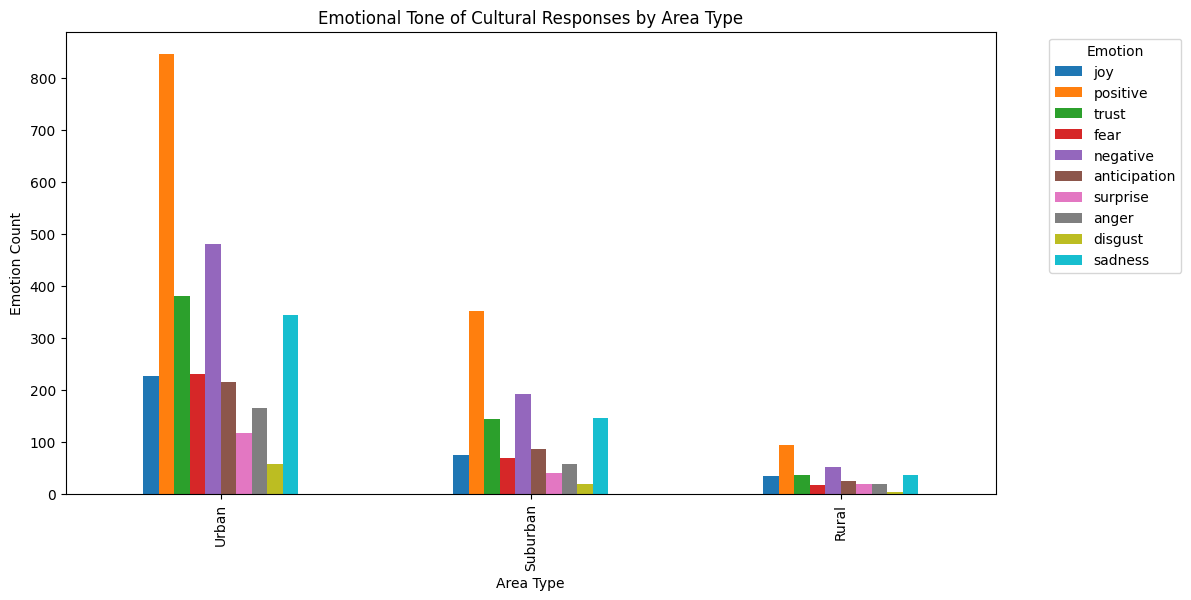

In [24]:
emotion_df.plot(kind='bar', figsize=(12,6))
plt.title('Emotional Tone of Cultural Responses by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Emotion Count')
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [25]:
# exporting the different responses by area alongside their associasted country and sentiment

def save_responses_by_area(df, area_type):
    subset = df[df['Area Type'] == area_type]
    filename = f"{area_type.lower()}_responses.txt"
    with open(filename, 'w', encoding='utf-8') as f:
        for _, row in subset.iterrows():
            f.write(f"Country: {row.get('Country', 'Unknown')}\n")
            f.write(f"Response:\n{row['English Response']}\n")
            f.write(f"Emotions: {row['Emotions']}\n")
            f.write("-" * 40 + "\n")
    print(f"Saved {len(subset)} responses to {filename}")


for area in q3_df['Area Type'].unique():
    save_responses_by_area(q3_df, area)


Saved 725 responses to urban_responses.txt
Saved 300 responses to suburban_responses.txt
Saved 84 responses to rural_responses.txt


We analyzed the qualitative responses about culture by applying sentiment and emotion detection techniques. Each response was scored for overall sentiment polarity, revealing the general positive or negative tone. Additionally, we identified the presence and intensity of specific emotions such as joy, fear, disgust, and trust. By grouping responses according to respondents’ living environments (urban, suburban, rural) and countries, we compared emotional tones across these different contexts. This allowed us to uncover how feelings about cultural identity and concerns vary geographically and by community type, providing nuanced insights into the emotional landscape surrounding culture in the face of emerging technologies.

Q4. If you could make world leaders understand one thing, what would it be?

In [26]:
q4_df = d1s1[d1s1['Question'] == "If you could make world leaders understand one thing, what would it be?"][['English Response', 'Submitted By']]

q4_df['Area Type'] = q4_df['Submitted By'].apply(extract_area)
q4_df['Country'] = q4_df['Submitted By'].apply(extract_country)

# q4_df


In [27]:
from bertopic import BERTopic

def clean_text_for_topic_modeling(text):
    if pd.isna(text):
        return ''
    words = re.findall(r'\b\w+\b', text.lower())
    filtered = [w for w in words if w not in stopwords and len(w) > 3]
    return ' '.join(filtered)

cleanq4_df = q4_df['English Response'].dropna().apply(clean_text_for_topic_modeling).tolist()

topic_model = BERTopic(language="english")
topics, probs = topic_model.fit_transform(cleanq4_df)

C:\Users\Asus-pc\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
topic_info = topic_model.get_topic_info()
topic_info.head(10)  # Show the top 10 topics

,Topic,Count,Name,Representation,Representative_Docs
0,-1,359,-1_people_live_stop_life,"[people, live, stop, life, peace, care, respect, human, cultural, humans]","[think should understand greed world leaders greedy care population only care money power prevalent every country government, while pursuing economic growth technological innovation must ensure undermine unique cultural heritage values around world cultural diversity wealth human society enriches lives enhances creativity promotes global understanding cooperation changes brought technological progress globalization should come expense cultural diversity leaders formulate policies measures ensure development technology respects supports existence different cultures rather homogenizing marginalizing includes considering cultural diversity technology design promoting cross cultural dialogue cooperation supporting protection inheritance traditional culture promote global progress while maintaining cultural diversity human society future world full innovation respects each unique cultural expression, people want live peaceful life stop going help each other]"
1,0,68,0_technology_ethical_technological_ensuring,"[technology, ethical, technological, ensuring, leaders, world, education, privacy, equitable, understand]","[want world leaders understand importance balancing technological advancement ethical considerations ensuring technologies benefit everyone harm privacy fairness human rights, world leaders understand critical importance balancing technological advancement ethical considerations specifically emphasize technological progress should come expense human rights privacy equitable access ensuring technological benefits shared widely ethically help create future innovation enhances quality life everyone rather deepening existing inequalities compromising fundamental values, want world leaders understand profound impact equitable access technology education global prosperity ensuring people regardless location background access high quality education technology resources drive innovation reduce inequalities create opportunities everyone contribute benefit economic social progress]"
2,1,49,1_climate_change_sustainable_global,"[climate, change, sustainable, global, action, term, future, leaders, long, world]","[want world leaders understand urgent collaborative sustainable action climate change must recognize environmental issue fundamental threat global stability human health economic security working together prioritizing long term environmental stewardship over short term gains committing equitable solutions secure livable planet future generations, world leaders understand thing profound importance long term thinking decision making critical issues climate change technological ethics global inequality require policies strategies prioritize future generations focusing sustainable solutions considering long term impacts decisions leaders help create equitable resilient world future, want world leaders understand urgent collaborative global action address climate change specifically should recognize health planet intertwined economic stability public health social equity effective climate policies require shared responsibility immediate action investment sustainable solutions ensure livable future prevent worsening global crises]"
3,2,43,2_power_money_everything_point,"[power, money, everything, point, character, worth, people, value, batman, much]","[life power money, money power everything, power people]"
4,3,37,3_life_every_matter_lives,"[life, every, matter, lives, matters, live, everyone, easy, human, purpose]","[every life important, every life matter, every human life matter]"
5,4,36,4_corruption_stop_corrupt_country,"[corruption, stop, corrupt, country, corrupts, greed, remove, vote, cost, bank]","[stop corruption, stop corruption, corruption]"
6,5,36,5_know_careful_really_purely,"[know, careful, really, purely, pathetic, wise, lots, idiots, funny, fucking]","[

In [29]:
q4_df = q4_df.reset_index(drop=True)
q4_df['Topic'] = topics

with open("bertopic_topic_summary.txt", "w", encoding="utf-8") as f:
    for topic_num in q4_df['Topic'].unique():
        f.write(f"\n--- Topic {topic_num} ---\n")
        f.write("Top keywords: " + str(topic_model.get_topic(topic_num)) + "\n")
        
        examples = q4_df[q4_df['Topic'] == topic_num]['English Response'].head(3)
        f.write("Examples:\n")
        for response in examples:
            f.write(f"- {response}\n")
        f.write("\n")


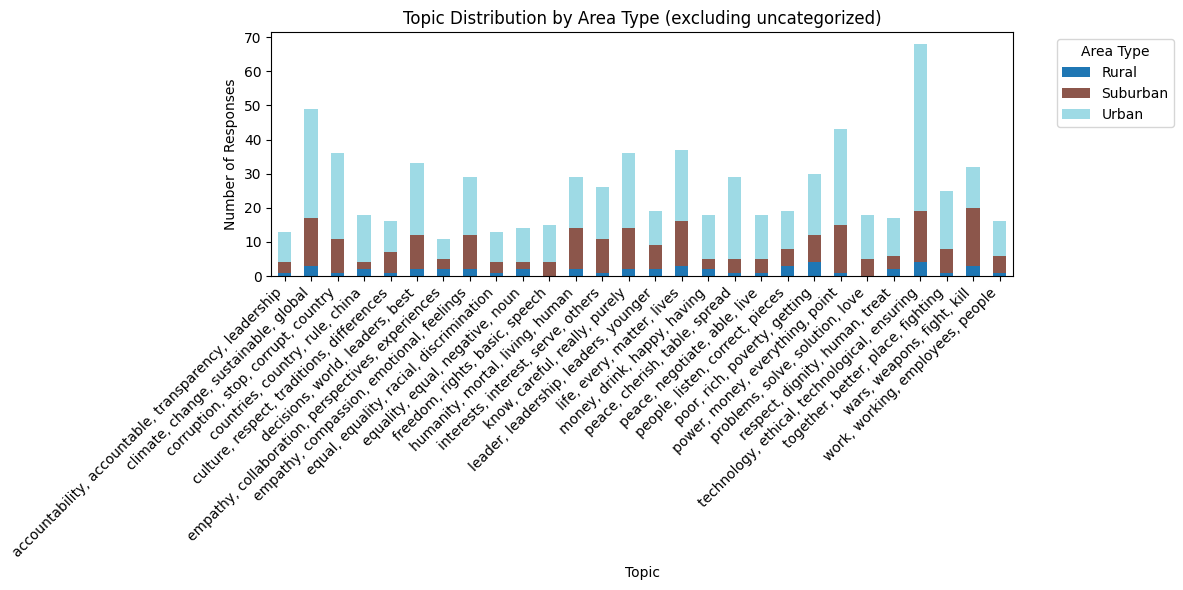

In [30]:
# how many times does a topic appear in each area type

topic_by_area = pd.crosstab(q4_df['Topic'], q4_df['Area Type'])
# topic_by_area.head()
topic_labels = {}
for topic_num in topic_model.get_topic_info()['Topic']:
    if topic_num == -1:
        topic_labels[topic_num] = "Other / Uncategorized"
        continue

    # Get top words for the topic
    top_words = topic_model.get_topic(topic_num)
    top_keywords = [word for word, _ in top_words[:4]]  # Adjust number as needed
    label = ", ".join(top_keywords)
    
    topic_labels[topic_num] = label

q4_df['Topic Label'] = q4_df['Topic'].map(topic_labels)

topic_counts = q4_df['Topic Label'].value_counts().sort_values(ascending=False)
topic_area_ct = pd.crosstab(q4_df['Topic Label'], q4_df['Area Type'])
filtered_df = q4_df[q4_df['Topic'] != -1]
topic_area_ct = pd.crosstab(filtered_df['Topic Label'], filtered_df['Area Type'])

# Plot stacked bar chart
topic_area_ct.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("Topic Distribution by Area Type (excluding uncategorized)")
plt.xlabel("Topic")
plt.ylabel("Number of Responses")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Area Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




The graph is cool but let's look at the top 5 in each area type to get a better understanding.

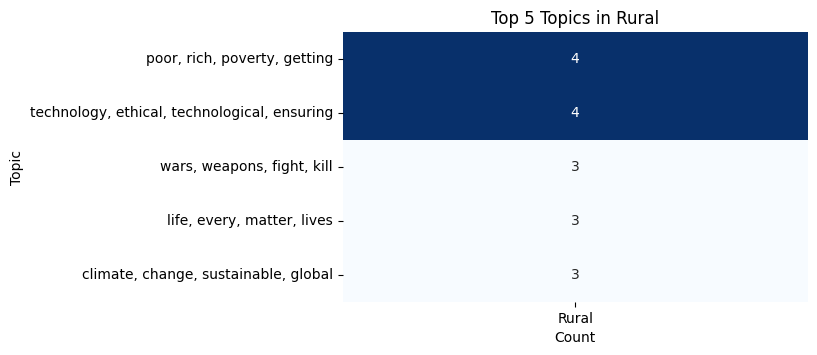

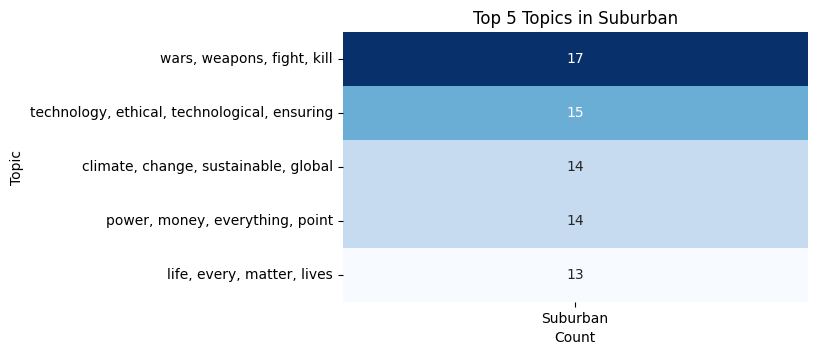

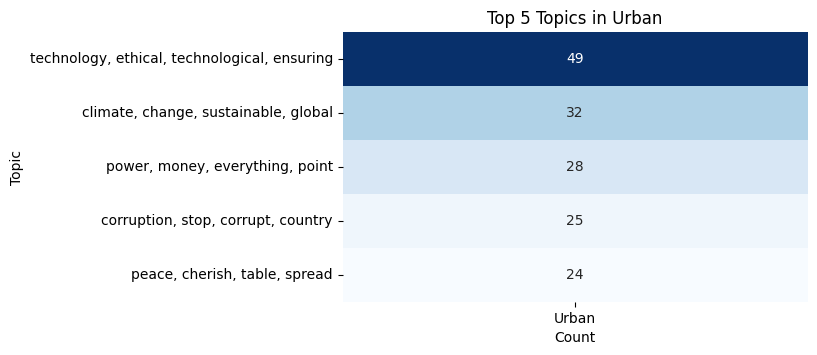

In [46]:
top_n = 5
top_topics_per_area = {}

for area in topic_area_ct.columns:
    # Sort topics descending by count for this area
    top_topics = topic_area_ct[area].sort_values(ascending=False).head(top_n).index.tolist()
    top_topics_per_area[area] = top_topics

top_topics = set(topic for topics in top_topics_per_area.values() for topic in topics)

filtered_topic_area_ct = topic_area_ct.loc[list(top_topics)]

top_n = 5  # Number of top topics per area type to show

for area in topic_area_ct.columns:
    # Get top topics for this area type
    top_topics = topic_area_ct[area].sort_values(ascending=False).head(top_n).index
    
    # Subset data for these topics and this area only
    data = topic_area_ct.loc[top_topics, [area]]
    
    plt.figure(figsize=(6, len(top_topics)*0.7))  # Adjust height by number of topics
    sns.heatmap(data, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Top {top_n} Topics in {area}")
    plt.xlabel("Count")
    plt.ylabel("Topic")
    plt.yticks(rotation=0)
    plt.show()

In [50]:
# Define your filters as (Area Type, Topic ID, output filename)
filters = [
    ("Rural", 8, "rural_topic_8.csv"),
    ("Suburban", 7, "suburban_topic_7.csv"),
    ("Urban", 0, "urban_topic_0.csv")
]

# Loop and extract
for area, topic_id, filename in filters:
    subset = q4_df[
        (q4_df['Area Type'] == area) &
        (q4_df['Topic'] == topic_id)
    ]
    
    if not subset.empty:
        subset.to_csv(filename, index=False)
        print(f"Saved {len(subset)} rows to {filename}")
    else:
        print(f"No data found for {area} with topic ID {topic_id}")


Saved 4 rows to rural_topic_8.csv
Saved 17 rows to suburban_topic_7.csv
Saved 49 rows to urban_topic_0.csv


Now moving on to Dataset 2:

Q5. Would you want your AI to be tailored to your local context? What would that look like?

In [32]:
q5_df = d2s1[d2s1['Question'] == "Would you want your AI to be tailored to your local context? What would that look like?"][['English Responses', 'Submitted By']]

q5_df['Area Type'] = q5_df['Submitted By'].apply(extract_area)
q5_df['Country'] = q5_df['Submitted By'].apply(extract_country)

# q5_df

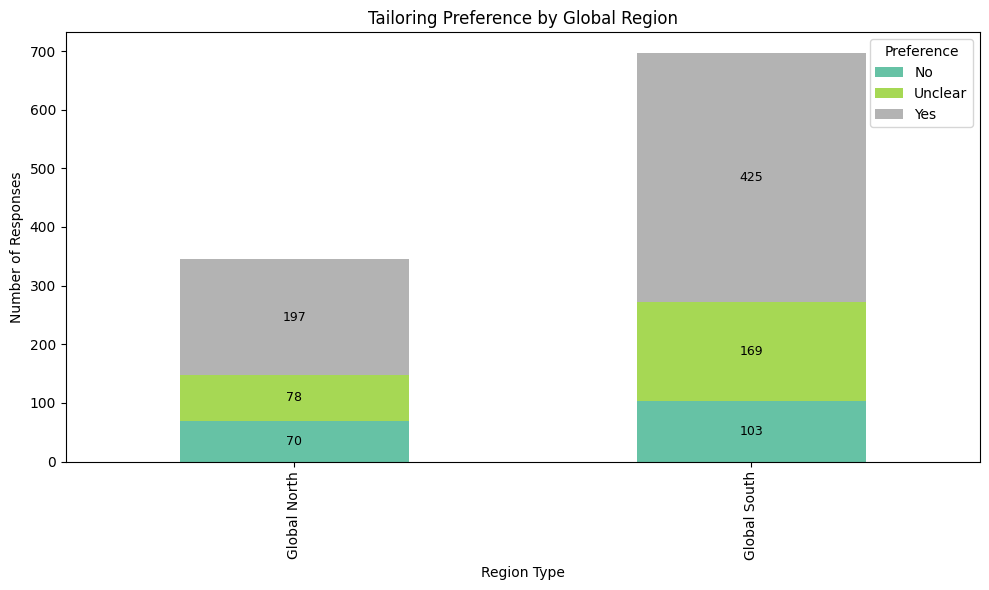

In [51]:
global_north = {
    'United States', 'Russia', 'Mexico', 'Japan', 'Turkey', 'Germany', 'United Kingdom', 'France', 'Italy', 'South Korea',
    'Spain', 'Canada', 'Ukraine', 'Poland', 'Uzbekistan', 'Australia', 'Kazakhstan', 'Netherlands', 'Romania', 'Sweden', 'Belgium',
    'Czech Republic', 'Portugal', 'Greece', 'Azerbaijan', 'Hungary', 'Israel', 'Austria', 'Belarus', 'Switzerland', 'Kyrgystan',
    'Bulgaria', 'Serbia', 'Denmark', 'Finland', 'Norway', 'Slovakia', 'Ireland', 'New Zealand', 'Croatia', 'Georgia', 'Moldova',
    'Armenia', 'Lithuania', 'Slovenia', 'Albania', 'Latvia', 'North Macedonia', 'Estonia', 'Cyprus', 'Luxembourg', 'Iceland',
    'Malta', 'Montenegro', 'Malta', 'Liechtenstein', 'Andorra', 'Monaco', 'San Marino', 'Vatican City', 'Palau', 'Tuvalu'
}

# as per https://worldpopulationreview.com/country-rankings/global-north-countries

def classify_region(country):
    if pd.isna(country):
        return 'Unknown'
    return 'Global North' if country in global_north else 'Global South'

q5_tailored_df = q5_df.copy()
q5_tailored_df['Region Type'] = q5_tailored_df['Country'].apply(classify_region)

def classify_tailoring_preference(text):
    text = str(text).lower()
    if any(kw in text for kw in ['yes', 'definitely', 'of course', 'i would', 'should be tailored', 'needs to be', 'yeah', 'help ', 'tailored to my local context', 'sure']):
        return 'Yes'
    elif any(kw in text for kw in ['no', 'not really', 'don’t need', 'do not want', 'should not', 'irrelevant']):
        return 'No'
    else:
        return 'Unclear'

q5_tailored_df['Tailoring Preference'] = q5_tailored_df['English Responses'].apply(classify_tailoring_preference)

pref_counts_region = q5_tailored_df.groupby(['Region Type', 'Tailoring Preference']).size().unstack(fill_value=0)

ax = pref_counts_region.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Tailoring Preference by Global Region')
plt.xlabel('Region Type')
plt.ylabel('Number of Responses')
plt.legend(title='Preference')
plt.tight_layout()

# Add value labels to each bar segment
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=9)

plt.show()



In [88]:
# Global South
gs_yes = q5_tailored_df[
    (q5_tailored_df['Region Type'] == 'Global South') &
    (q5_tailored_df['Tailoring Preference'] == 'Yes')
]['English Responses'].dropna()
gs_no = q5_tailored_df[
    (q5_tailored_df['Region Type'] == 'Global South') &
    (q5_tailored_df['Tailoring Preference'] == 'No')
]['English Responses'].dropna()

# Global North
gn_yes = q5_tailored_df[
    (q5_tailored_df['Region Type'] == 'Global North') &
    (q5_tailored_df['Tailoring Preference'] == 'Yes')
]['English Responses'].dropna()
gn_no = q5_tailored_df[
    (q5_tailored_df['Region Type'] == 'Global North') &
    (q5_tailored_df['Tailoring Preference'] == 'No')
]['English Responses'].dropna()


print("Global South YES examples:")
print(gs_yes.sample(5, random_state=19).tolist())

print("\nGlobal South NO examples:")
print(gs_no.sample(5, random_state=69).tolist())


Global South YES examples:
['Yes it should in a way it would look like my unique social life in a way where somehow am not talkative alot and it should inderstand my cultral practices where are unique in my way together with attitudes and my behaviour it should understand me a lot how cheerful I am and sometimes I will be quiet a lot, it should understand that.', 'I want my AI to explain briefly every help I need in the simplest way I can understand it.', 'I will need AI to help in developing training manuals that will be used to upskill members of staff. The AI should customize the training to address the different skill levels and ensure every employee is upskilled based on their levels of expertise.', 'Yes. In a way that it understands the socio-demographic profiles of my region in such a case that it provides solutions that are relevant and align with the local needs and circumstances surrounding its population.', 'yes']

Global South NO examples:
['No, it can bring in more infomat

In [72]:

print("Global North YES examples:")
print(gn_yes.sample(5, random_state=4).tolist())

print("\nGlobal North NO examples:")
print(gn_no.sample(5, random_state=7).tolist())


Global North YES examples:
['Yes, I would want my AI to be tailored to my local context so that it can give better answers based on past interactions. ', 'Yes, of course. Especially if I ask a specific question, I would like the answer to take into account my reality.', 'Yes. For example, if I asked an AI to write a cover letter for me, I would want it to know who I am - my skills and abilities, my education, the position I want to apply for.', 'It could be very helpful, but it surely would be difficult to achieve.', 'Tailoring an AI to a local context can significantly enhance its relevance, usability, and effectiveness for users in that specific region or community. If I were to be tailored to a local context, it would involve several key adjustments and customizations to better align with the cultural, linguistic, social, and practical needs of the local population. Here’s what that might look like:\nLanguage and Dialects\nLocal Language Support :The AI would be fluent in the primar

Q6. Think about your goals: Are you using AI mainly for learning, productivity, creativity, or something else? How well is it working?

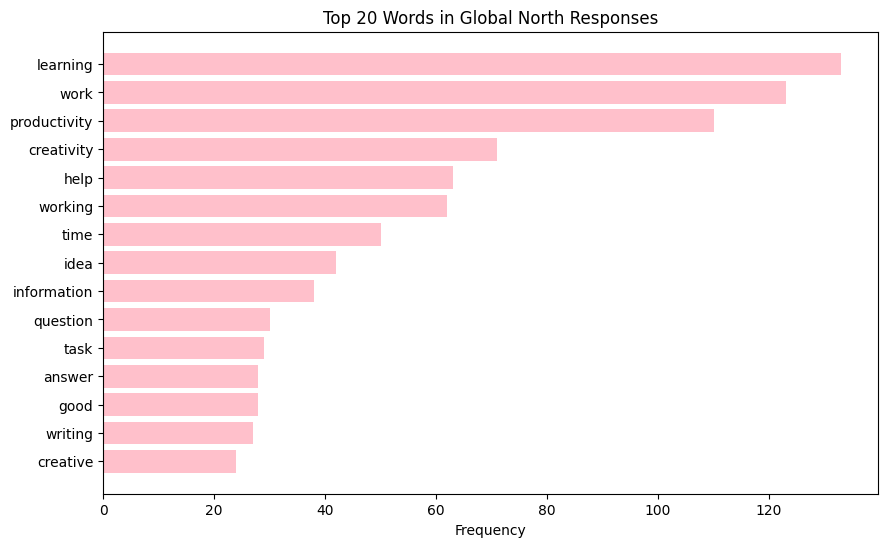

In [36]:
q6_df = d2s1[d2s1['Question'] == "Think about your goals:\nAre you using AI mainly for learning, productivity, creativity, or something else? How well is it working?"][['English Responses', 'Submitted By']]

q6_df['Area Type'] = q6_df['Submitted By'].apply(extract_area)
q6_df['Country'] = q6_df['Submitted By'].apply(extract_country)
q6_df['Region Type'] = q6_df['Country'].apply(classify_region)


q6_df = q6_df.dropna(subset=['English Responses', 'Region Type'])
grouped_responses = q6_df.groupby('Region Type')['English Responses'].apply(lambda x: ' '.join(x)).to_dict()

keywords_by_region = {}
for region, text in grouped_responses.items():
    keywords_by_region[region] = get_common_words(text)

# for region, keywords in keywords_by_region.items():
#     print(f"\nTop keywords for {region}:")
#     for word, count in keywords:
#         print(f"{word}: {count}")

common_words_north = get_common_words(grouped_responses['Global North'], top_n=15)
words, counts = zip(*common_words_north)

plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='pink')
plt.xlabel('Frequency')
plt.title('Top 20 Words in Global North Responses')
plt.gca().invert_yaxis()
plt.show()


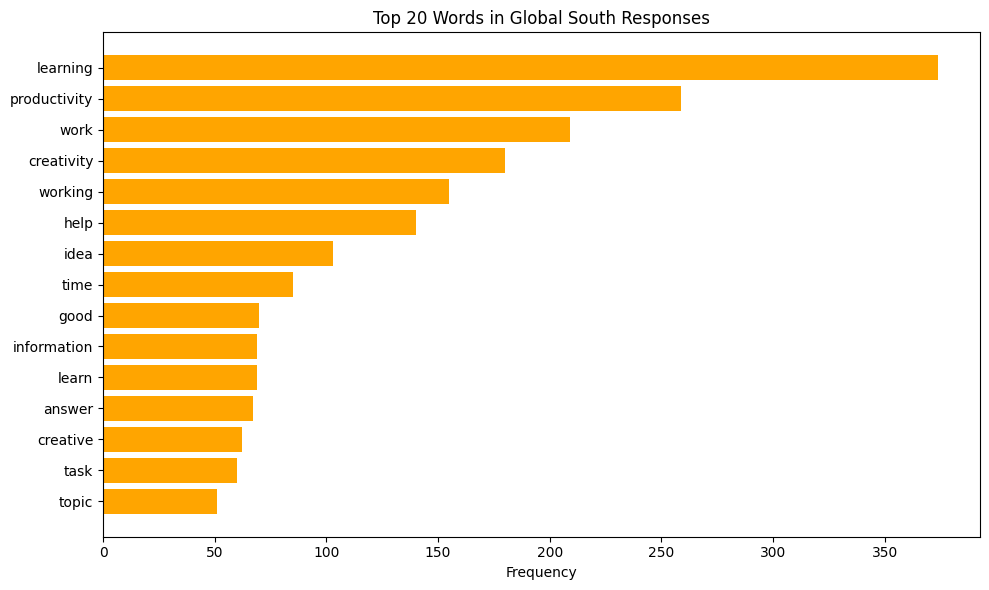

In [37]:
common_words_south = get_common_words(grouped_responses['Global South'], top_n=15)

words, counts = zip(*common_words_south)

plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='orange')
plt.xlabel('Frequency')
plt.title('Top 20 Words in Global South Responses')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [38]:
d2s1['Urban_Rural_Diff'] = d2s1['O4: Urban (716)'] - d2s1['O4: Rural (74)']
top10_diff = d2s1.nlargest(15, 'Urban_Rural_Diff')
top10_diff[['Question', 'English Responses','O4: Urban (716)', 'O4: Rural (74)', 'Urban_Rural_Diff']]

,Question,English Responses,O4: Urban (716),O4: Rural (74),Urban_Rural_Diff
18244,"If you could have your AI think, behave / respond like any person in the world, who would it be and why?","I would want it to behave and respond like a therapist would. \n\nBe respectful, Honest and trustworthy.",0.55,0.31,0.24
18336,"If you could have your AI think, behave / respond like any person in the world, who would it be and why?","would make her respond to me as a learned person with an enviable intellect, this would make me always want to have a conversation with her again.",0.53,0.29,0.24
18344,"If you could have your AI think, behave / respond like any person in the world, who would it be and why?","My aunt she is empathic, ready to help, ready to listen and has a strong personality",0.53,0.29,0.24
18395,"If you could have your AI think, behave / respond like any person in the world, who would it be and why?","I would like it to respond like my professor because she is calm, informative, and kind.",0.53,0.29,0.24
18272,"If you could have your AI think, behave / respond like any person in the world, who would it be and why?","I think it would be like a friend, in my opinion, some trustworthy and loyal person.",0.52,0.28,0.24
18117,"If you could have your AI think, behave / respond like any person in the world, who would it be and why?",Like a professor in class who values opinion of all their students without any bias,0.55,0.32,0.23
18352,"If you could have your AI think, behave / respond like any person in the world, who would it be and why?","It would be someone I am familiar with and open to talk without hesitation,as it would feel more secure option, rather than talking to a puppet of another culture, trained by reading conversations of snapchat teens, who are mostly practically dumb, disguised as a sincere advisor. It's a great comedy, to imagine it sometimes.",0.52,0.29,0.23
18644,"If you could have your AI think, behave / respond like any person in the world, who would it be and why?","I would make her my most trusted advisor as possible, to be extremely helpful in making decisions. In other words, she would be like my late mother.",0.51,0.29,0.22
7804,"What topics or types of advice should an AI never give in your cultural context, even if asked?",How to change or alter your identity. If someone dislikes a certain part of their culture. Anything that may be historically offensive.,0.54,0.33,0.21
8021,"What topics or types of advice should an AI never give in your cultural context, even if asked?",need to stay in context,0.54,0.33,0.21


In [92]:
# d1s1['Urban_Rural_Diff'] = d1s1['O4: Urban (820)'] - d1s1['O4: Rural (95)']
# # top10_diff = d1s1.nlargest(40, 'Urban_Rural_Diff')
# top10_diff = d1s1.nlargest(40, 'Urban_Rural_Diff')
# top10_diff[['Question', 'English Response','O4: Urban (820)', 'O4: Rural (95)', 'Urban_Rural_Diff']]

d1s1['Urban_Rural_Diff'] = np.abs(d1s1['O4: Urban (820)'] - d1s1['O4: Rural (95)'])
top10_diff = d1s1.nlargest(15, 'Urban_Rural_Diff')
top10_diff[['Question', 'English Response', 'Submitted By','O4: Urban (820)', 'O4: Rural (95)', 'Urban_Rural_Diff']]


,Question,English Response,Submitted By,O4: Urban (820),O4: Rural (95),Urban_Rural_Diff
10198,"What is one ethical or moral principle, virtue, or value that you think is important but not reflected in the way technology is developed today? Please explain it in detail.",We are ethical which our elders tells us. We respect our traditions.,"Asia, O1: English, O2: 36-45, O3: Male, O4: Urban, O5: Equally concerned and excited, O6: Islam, O7: India, Souther Asia",0.56,0.31,0.25
10399,"What is one ethical or moral principle, virtue, or value that you think is important but not reflected in the way technology is developed today? Please explain it in detail.",Respecting everybody's worth,"Africa, Eastern Africa, O1: English, O2: 18-25, O3: Female, O4: Urban, O5: More excited than concerned, O6: Christianity, O7: Kenya",0.56,0.31,0.25
10104,"What is one ethical or moral principle, virtue, or value that you think is important but not reflected in the way technology is developed today? Please explain it in detail.",Kindness and emotional support,"Asia, O1: English, O2: 36-45, O3: Male, O4: Urban, O5: Equally concerned and excited, O6: Hinduism, O7: India, Souther Asia",0.57,0.33,0.24
10235,"What is one ethical or moral principle, virtue, or value that you think is important but not reflected in the way technology is developed today? Please explain it in detail.",Respect for human life: Valuing and respecting the worth of every individual,"Asia, Eastern Asia, O1: English, O2: 18-25, O3: Female, O4: Urban, O5: Equally concerned and excited, O6: Islam, O7: Japan",0.57,0.33,0.24
10244,"What is one ethical or moral principle, virtue, or value that you think is important but not reflected in the way technology is developed today? Please explain it in detail.",Respect for human life: Valuing and respecting the worth of every individual,"Asia, O1: English, O2: 26-35, O3: Male, O4: Suburban, O5: More excited than concerned, O6: Islam, O7: Indonesia, South Eastern Asia",0.57,0.33,0.24
10252,"What is one ethical or moral principle, virtue, or value that you think is important but not reflected in the way technology is developed today? Please explain it in detail.",Honesty is most important. Without it there is no trust there is fair fame.,"44+, 55+, North America, Northern America, O1: English, O2: 56-65, O3: Female, O4: Urban, O5: More concerned than excited, O6: Christianity, O7: Canada",0.57,0.33,0.24
10370,"What is one ethical or moral principle, virtue, or value that you think is important but not reflected in the way technology is developed today? Please explain it in detail.",Loyalty is one of ethical which not reflected by technology is developed today and is very rare and hard to find anymore,"Asia, O1: English, O2: 18-25, O3: Male, O4: Suburban, O5: Equally concerned and excited, O6: Hinduism, O7: India, Souther Asia",0.56,0.33,0.23
10383,"What is one ethical or moral principle, virtue, or value that you think is important but not reflected in the way technology is developed today? Please explain it in detail.",Treating everyone with kindness,"Africa, Eastern Africa, O1: English, O2: 26-35, O3: Female, O4: Urban, O5: Equally concerned and excited, O6: Christianity, O7: Kenya",0.55,0.32,0.23
10576,"What is one ethical or moral principle, virtue, or value that you think is important but not reflected in the way technology is developed today? Please explain it in detail.",Humanity and kindness towards all,"Asia, O1: English, O2: 36-45, O3: Female, O4: Urban, O5: Equally concerned and excited, O6: Hinduism, O7: India, Souther Asia",0.55,0.32,0.23
9917,"What is one ethical or moral principle, virtue, or value that you think is important but not reflected in the way technology is developed today? Please explain it in detail.",The principle of being kind and respect to each other.,"Asia, O1: English, O2: 26-35, O3: Female, O4: Suburban, O5: More concerned than excited, O6: Buddhism, O7: Vietnam, South Eastern Asia",0.58,0.35,0.23
